## Boston 데이터 분석

In [252]:
import torch
from sklearn.datasets import fetch_openml
import pandas as pd

boston_dataset = fetch_openml(name="boston")
print(boston_dataset.keys())


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


c:\Users\user\miniconda3\envs\deeplearning\Lib\site-packages\sklearn\datasets\_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


In [16]:
boston_dataset.frame

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [18]:
print(boston_dataset.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [253]:
X = boston_dataset.data
y = boston_dataset.target
print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (506, 13), y shape: (506,)


In [254]:
X.info()

# 데이터 형 변환
X = X.astype({"CHAS": "float", "RAD": "float"})
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 45.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float6

In [255]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"X shape: {X.shape}, y shape: {y.shape}")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X shape: (506, 13), y shape: (506,)
X_train shape: (404, 13), y_train shape: (404,)
X_test shape: (102, 13), y_test shape: (102,)


In [256]:
from torch import nn, optim
import matplotlib.pyplot as plt
import numpy as np

# 모델 생성
model = nn.Sequential(
    nn.Linear(13, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)


model

Sequential(
  (0): Linear(in_features=13, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=1, bias=True)
)

In [257]:
print([p[0] for p in model.parameters()])
print([p[0] for p in model.parameters()][0][0].item())
print([p[0] for p in model.parameters()][0][-1].item())

[tensor([ 0.2277,  0.1137, -0.1528, -0.2679,  0.1255, -0.1473,  0.0261,  0.0416,
        -0.1789,  0.0401, -0.2318, -0.2062,  0.0294],
       grad_fn=<SelectBackward0>), tensor(-0.2528, grad_fn=<SelectBackward0>), tensor([ 0.0893, -0.0368, -0.0652,  0.0044, -0.0352,  0.0934,  0.0695,  0.0534,
        -0.0278, -0.0645, -0.0568,  0.0106,  0.1220,  0.0463,  0.0545, -0.0738,
        -0.0931, -0.0749,  0.0367,  0.0417, -0.0641,  0.0423,  0.0649, -0.0047,
         0.0100,  0.0843, -0.0943,  0.1226,  0.0211,  0.0239, -0.1085, -0.0613,
        -0.0211, -0.0438,  0.0716, -0.0245, -0.0208, -0.0693, -0.0692,  0.0563,
         0.0850,  0.0908,  0.0286,  0.0903,  0.0161, -0.0745, -0.0573, -0.0759,
        -0.0341, -0.0031, -0.0396,  0.0313,  0.0618, -0.1164, -0.0966, -0.0564,
        -0.0067,  0.1176,  0.0182,  0.0871,  0.0899, -0.0068,  0.1241, -0.0626],
       grad_fn=<SelectBackward0>), tensor(-0.0264, grad_fn=<SelectBackward0>), tensor([-0.0584,  0.0081, -0.1307, -0.0307, -0.1136, -0.0607, -0.0

In [258]:
# # 1. 숫자형 데이터로 변환
# X_train = X_train.apply(pd.to_numeric, errors='coerce')

# # 2. 결측치 처리
# X_train = X_train.fillna(0)

# 3. Tensor로 변환
X_train_ts = torch.FloatTensor(X_train.values)
y_train_ts = torch.FloatTensor(y_train.values)

# 4. 차원 추가
y_train_ts = y_train_ts.unsqueeze(1)

print(X_train_ts.shape, y_train_ts.shape)
x_tmp = list([float(x[0]) for x in X_train_ts])  # 시각화용 첫번째 피쳐
x_tmp = np.array(x_tmp)
# print(x_tmp)

torch.Size([404, 13]) torch.Size([404, 1])


0.16769471764564514 -0.11309439688920975


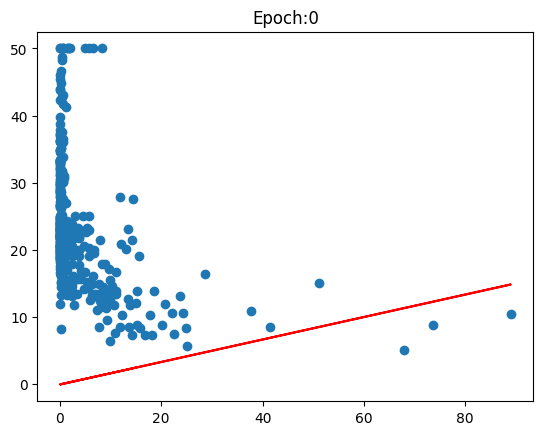

0.12954670190811157 -0.2772406041622162


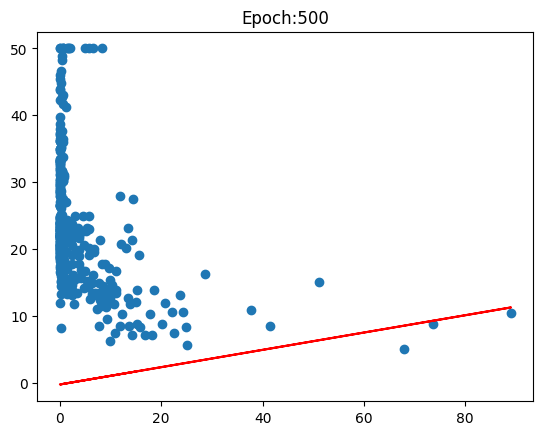

In [129]:
epochs = 1000
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=5e-4)

# 저장소 만들기
loss_history = []
ws = []
bs = []

for epoch in range(epochs):
    optimizer.zero_grad()  # 초기화
    yhat = model(X_train_ts)  # 예측값 구하기
    loss = criterion(yhat, y_train_ts)  # 손실율 계산
    
    # # 조건에 다른 조기 학습 종료
    # loss_diff = loss_history[-1] - loss if len(loss_history) > 1 else 1
    # if loss_diff < 1e-10:
    #     print("더 이상 업데이트 되지 않아 학습을 종료합니다.", loss_diff.item())
    #     break
    
    loss_history.append(loss.item())
    loss.backward()  # 역전파
    optimizer.step()  # 최적화함수로 파라미터 업데이트
    
    # 가중치와 절편 저장 (복사해서 저장해야 덮어쓰지 않음)
    w = [p[0] for p in model.parameters()][0][0].item()
    b = [p[0] for p in model.parameters()][0][-1].item()
    # w, b = model.parameters()
    ws.append(w)
    bs.append(b)
    
    # 출력
    if epoch % 500 == 0:
        print(w, b)
        # print(f"Epoch : {epoch}, W : {w.item()}, b:{b.item()}, Loss:{loss.item()}")

        # 그림 그리기
        plt.Figure(figsize=(5, 3))
        plt.scatter(x_tmp, y_train)
        plt.plot(x_tmp, w * x_tmp + b, color = "red")
        plt.title(f"Epoch:" + str(epoch))
        plt.show()

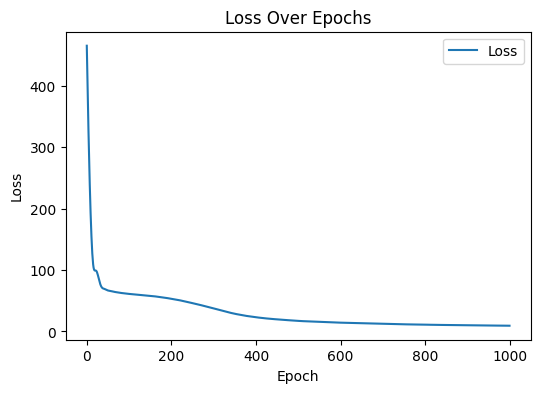

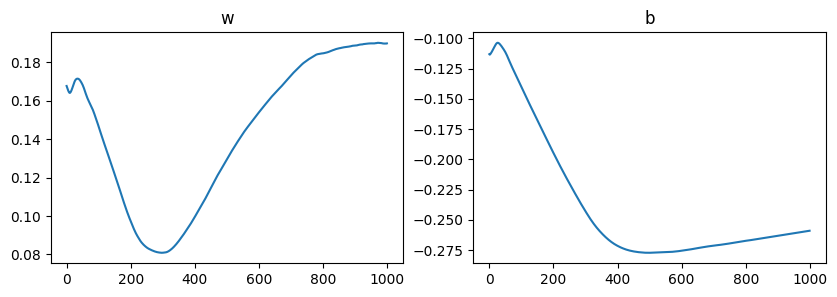

In [130]:
# 최종 Loss 그래프
plt.figure(figsize=(6, 4))
plt.plot(loss_history, label="Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 가중치와 절편 그래프
fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].plot(ws)
ax[0].set_title("w")
ax[1].plot(bs)
ax[1].set_title("b")
plt.show()

In [131]:
# 데이터를 텐서로 변경
X_test_ts = torch.FloatTensor(X_test.values)
y_test_ts = torch.FloatTensor(y_test.values)

print(f"X_test shape: {X_test_ts.shape}, y_test shape: {y_test_ts.shape}")


X_test shape: torch.Size([102, 13]), y_test shape: torch.Size([102])


In [132]:
# 테스트 평가
model.eval()

with torch.no_grad():
    y_test_pred = model(X_test_ts)
    MSE = criterion(y_test_pred, y_test_ts).item()
    
print(MSE)
    

136.28585815429688


c:\Users\user\miniconda3\envs\deeplearning\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([102])) that is different to the input size (torch.Size([102, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


### Validation set

In [138]:
from sklearn.model_selection import train_test_split

# train test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"X shape: {X.shape}, y shape: {y.shape}")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X shape: (506, 13), y shape: (506,)
X_train shape: (404, 13), y_train shape: (404,)
X_test shape: (102, 13), y_test shape: (102,)


In [139]:
# train validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

print(f"X shape: {X.shape}, y shape: {y.shape}")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X shape: (506, 13), y shape: (506,)
X_train shape: (363, 13), y_train shape: (363,)
X_val shape: (41, 13), y_val shape: (41,)
X_test shape: (102, 13), y_test shape: (102,)


In [140]:
# validation을 적용한 학습
X_train_ts = torch.FloatTensor(X_train.values)
y_train_ts = torch.FloatTensor(y_train.values).unsqueeze(1)

X_val_ts = torch.FloatTensor(X_val.values)
y_val_ts = torch.FloatTensor(y_val.values).unsqueeze(1)

X_test_ts = torch.FloatTensor(X_test.values)
y_test_ts = torch.FloatTensor(y_test.values).unsqueeze(1)

In [152]:
# 모델 가중치 초기화
for m in model:
    if isinstance(m, nn.Linear):
        m.reset_parameters()

In [153]:
epochs = 10000
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=5e-5)

loss_history = {
    "train": [],
    "validation": []
}

for epoch in range(epochs):
    # train
    model.train()
    optimizer.zero_grad()  # 최적화 함수 초기화
    yhat = model(X_train_ts)  # 예측값 계산
    loss = criterion(yhat, y_train_ts)  # 손실율 계산
    loss.backward()  # 역전파
    optimizer.step()  # 최적화 함수로 파라미터 업데이트
    loss_history["train"].append(loss.item())  # loss
    
    # validation
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val_ts)
        val_loss = criterion(y_val_pred, y_val_ts)
    loss_history["validation"].append(val_loss.item())  # validation loss
    
    # learning curve 출력
    if epoch % 1000 == 0:
        print(f"Epoch: {epoch}, Train Loss: {loss.item(): .4f}, Validation Loss: {val_loss.item(): .4f}")
    


Epoch: 0, Train Loss:  1098.9978, Validation Loss:  1101.8518
Epoch: 1000, Train Loss:  70.0684, Validation Loss:  42.4794
Epoch: 2000, Train Loss:  61.6252, Validation Loss:  35.4620
Epoch: 3000, Train Loss:  45.1598, Validation Loss:  23.8900
Epoch: 4000, Train Loss:  26.7314, Validation Loss:  14.8415
Epoch: 5000, Train Loss:  19.9811, Validation Loss:  13.2594
Epoch: 6000, Train Loss:  15.3941, Validation Loss:  13.3158
Epoch: 7000, Train Loss:  12.0158, Validation Loss:  13.0184
Epoch: 8000, Train Loss:  9.5063, Validation Loss:  11.9062
Epoch: 9000, Train Loss:  7.7695, Validation Loss:  10.9770


<Figure size 600x400 with 0 Axes>

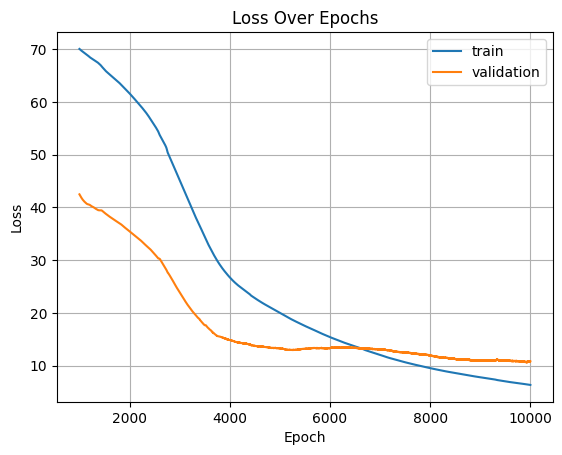

In [163]:
import matplotlib.pyplot as plt

# 학습 곡선 시각화
plt.figure(figsize=(6, 4))

# # Train Loss와 Validation Loss 각각 그리기
# plt.plot(loss_history["train"][1000:], label="Train Loss", linewidth=2)
# plt.plot(loss_history["validation"][1000:], label="Validation Loss", linewidth=2)
loss_data = pd.DataFrame(loss_history)
loss_data[1000:].plot()

# 그래프 제목 및 라벨 설정
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
# plt.legend()  # 범례 추가
plt.grid()  # 그리드 추가

plt.show()


### Batch를 적용한 학습

In [173]:
# batch가 필요한 이유
# - 데이터가 너무 크면 연산비용이 매우 커지기 때문에 데이터를 쪼개서 학습 진행

In [223]:
# 모델 가중치 초기화
for m in model:
    if isinstance(m, nn.Linear):
        m.reset_parameters()

In [224]:
print(f"X shape: {X.shape}, y shape: {y.shape}")
print(f"X_train shape: {X_train_ts.shape}, y_train shape: {y_train_ts.shape}")
print(f"X_val shape: {X_val_ts.shape}, y_val shape: {y_val_ts.shape}")
print(f"X_test shape: {X_test_ts.shape}, y_test shape: {y_test_ts.shape}")

X shape: (506, 13), y shape: (506,)
X_train shape: torch.Size([363, 13]), y_train shape: torch.Size([363, 1])
X_val shape: torch.Size([41, 13]), y_val shape: torch.Size([41, 1])
X_test shape: torch.Size([102, 13]), y_test shape: torch.Size([102, 1])


In [225]:
epochs = 8000
batch_size = 32
batch_num = X_train_ts.shape[0] // batch_size
val_batch_num = X_val_ts.shape[0] // batch_size

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=5e-5)

loss_history = {
    "train": [],
    "validation": []
}

for epoch in range(epochs):
    # train
    model.train()
    loss_tmp = []
    for i in range(batch_num - 1):
        start = i * batch_size
        end = start + batch_size
        X_batch = X_train_ts[start:end]
        y_batch = y_train_ts[start:end]
        
        optimizer.zero_grad()  # 최적화 함수 초기화
        yhat = model(X_batch)  # 예측값 계산
        loss = criterion(yhat, y_batch)  # 손실율 계산
        loss.backward()  # 역전파
        optimizer.step()  # 최적화 함수로 파라미터 업데이트
        loss_tmp.append(loss.item())
        
    loss_history["train"].append(sum(loss_tmp) / len(loss_tmp))  # loss
    
    # validation
    model.eval()
    val_loss_tmp = []
    for i in range(val_batch_num - 1):
        start = i * batch_size
        end = start + batch_size
        X_batch = X_val_ts[start:end]
        y_batch = y_val_ts[start:end]
        with torch.no_grad():
            y_val_pred = model(X_batch)
            val_loss = criterion(y_val_pred, y_batch)
        val_loss_tmp.append(val_loss.item())
        
    loss_history["validation"].append(sum(val_loss_tmp) / len(val_loss_tmp))  # validation loss
    
    # learning curve 출력
    if epoch % 1000 == 0:
        print(f"Epoch: {epoch}, Train Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")
    


Epoch: 0, Train Loss: 425.5435, Validation Loss: 484.9624
Epoch: 1000, Train Loss: 9.7517, Validation Loss: 13.5304
Epoch: 2000, Train Loss: 4.7830, Validation Loss: 12.6131
Epoch: 3000, Train Loss: 3.3776, Validation Loss: 11.1265
Epoch: 4000, Train Loss: 2.7708, Validation Loss: 9.8789
Epoch: 5000, Train Loss: 2.4990, Validation Loss: 9.1120
Epoch: 6000, Train Loss: 2.2052, Validation Loss: 8.6044
Epoch: 7000, Train Loss: 2.2017, Validation Loss: 8.9474


<Figure size 600x400 with 0 Axes>

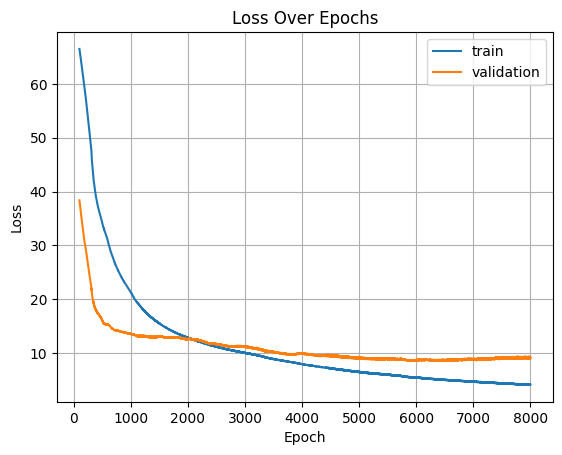

In [226]:
import matplotlib.pyplot as plt

# 학습 곡선 시각화
plt.figure(figsize=(6, 4))

# Train Loss와 Validation Loss 각각 그리기
loss_data = pd.DataFrame(loss_history)
loss_data[100:].plot()

# 그래프 제목 및 라벨 설정
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()  # 그리드 추가
plt.show()


In [227]:
# 테스트 평가
model.eval()

with torch.no_grad():
    y_test_pred = model(X_test_ts)
    MSE = criterion(y_test_pred, y_test_ts).item()
    
print(MSE)

12.17562484741211


### cuda 사용

In [240]:
torch.cuda.is_available()

True

In [248]:
import torch

# 사용 가능한 GPU 개수 확인
print(f"사용 가능한 GPU 개수: {torch.cuda.device_count()}")

# 각 GPU 이름 확인
for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)}")


사용 가능한 GPU 개수: 1
GPU 0: NVIDIA GeForce RTX 4070 Laptop GPU


In [259]:
device = "cuda" if torch.cuda.is_available() else "cpu"

from torch import nn, optim
import matplotlib.pyplot as plt
import numpy as np

# 모델 생성
model = nn.Sequential(
    nn.Linear(13, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

model = model.to(device)

In [260]:

from sklearn.model_selection import train_test_split

# train test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# train validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

X_train_ts = torch.FloatTensor(X_train.values)
y_train_ts = torch.FloatTensor(y_train.values).unsqueeze(1)

X_val_ts = torch.FloatTensor(X_val.values)
y_val_ts = torch.FloatTensor(y_val.values).unsqueeze(1)

X_test_ts = torch.FloatTensor(X_test.values)
y_test_ts = torch.FloatTensor(y_test.values).unsqueeze(1)

print(f"X shape: {X.shape}, y shape: {y.shape}")
print(f"X_train shape: {X_train_ts.shape}, y_train shape: {y_train_ts.shape}")
print(f"X_val shape: {X_val_ts.shape}, y_val shape: {y_val_ts.shape}")
print(f"X_test shape: {X_test_ts.shape}, y_test shape: {y_test_ts.shape}")


X shape: (506, 13), y shape: (506,)
X_train shape: torch.Size([323, 13]), y_train shape: torch.Size([323, 1])
X_val shape: torch.Size([81, 13]), y_val shape: torch.Size([81, 1])
X_test shape: torch.Size([102, 13]), y_test shape: torch.Size([102, 1])


In [261]:
epochs = 1000
batch_size = 20
batch_num = X_train_ts.shape[0] // batch_size
val_batch_num = X_val_ts.shape[0] // batch_size

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=5e-5)

loss_history = {
    "train": [],
    "validation": []
}

for epoch in range(epochs):
    # train
    model.train()
    loss_tmp = []
    for i in range(batch_num - 1):
        start = i * batch_size
        end = start + batch_size
        X_batch = X_train_ts[start:end].to(device)
        y_batch = y_train_ts[start:end].to(device)
        
        optimizer.zero_grad()  # 최적화 함수 초기화
        yhat = model(X_batch)  # 예측값 계산
        loss = criterion(yhat, y_batch)  # 손실율 계산
        loss.backward()  # 역전파
        optimizer.step()  # 최적화 함수로 파라미터 업데이트
        loss_tmp.append(loss.item())
        
    loss_history["train"].append(sum(loss_tmp) / len(loss_tmp))  # loss
    
    # validation
    model.eval()
    val_loss_tmp = []
    for i in range(val_batch_num - 1):
        start = i * batch_size
        end = start + batch_size
        X_batch = X_val_ts[start:end].to(device)
        y_batch = y_val_ts[start:end].to(device)
        with torch.no_grad():
            y_val_pred = model(X_batch)
            val_loss = criterion(y_val_pred, y_batch)
        val_loss_tmp.append(val_loss.item())
        
    loss_history["validation"].append(sum(val_loss_tmp) / len(val_loss_tmp))  # validation loss
    
    # learning curve 출력
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Train Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")
    


Epoch: 0, Train Loss: 379.6535, Validation Loss: 606.8868
Epoch: 100, Train Loss: 24.6172, Validation Loss: 86.2176
Epoch: 200, Train Loss: 23.6020, Validation Loss: 79.5572
Epoch: 300, Train Loss: 20.3797, Validation Loss: 68.7481
Epoch: 400, Train Loss: 16.3239, Validation Loss: 56.1633
Epoch: 500, Train Loss: 12.6180, Validation Loss: 44.8082
Epoch: 600, Train Loss: 11.6877, Validation Loss: 38.4078
Epoch: 700, Train Loss: 11.7446, Validation Loss: 33.9478
Epoch: 800, Train Loss: 10.2801, Validation Loss: 32.3698
Epoch: 900, Train Loss: 9.0306, Validation Loss: 31.3134


In [262]:
from torchsummary import summary
summary(model, input_size=(32,13))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 32, 64]             896
              ReLU-2               [-1, 32, 64]               0
            Linear-3               [-1, 32, 32]           2,080
              ReLU-4               [-1, 32, 32]               0
            Linear-5               [-1, 32, 32]           1,056
              ReLU-6               [-1, 32, 32]               0
            Linear-7                [-1, 32, 1]              33
Total params: 4,065
Trainable params: 4,065
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.02
Estimated Total Size (MB): 0.08
----------------------------------------------------------------


In [269]:
# 파라미터 개수 확인해보기
print((13 + 1) * 64)
print((64 + 1) * 32)
print((32 + 1) * 32)
print((32 + 1) * 1)


896
2080
1056
33


In [270]:
# 클래스 활용

class BostonNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(13, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.layer3(x)
        return X
    

model = BostonNet()
model

BostonNet(
  (layer1): Linear(in_features=13, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)